In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [ ]:

# Load ROI data
data_path = Path("../data/roi_data.pickle")
images_path = Path("D:/TestData/fenestrations/images")

# data_path = Path("../data/test.pickle")
data = pd.read_pickle(data_path)

# Extract the DataFrames
rois_df = data['rois']
summary_df = data['summary']

# Normalize summary schema to unit-suffixed names (supports older pickle files)
# summary_rename_map = {
#     "mean_cluster_neighbor_distance": "mean_cluster_neighbor_distance_px",
#     "mean_cluster_neighbor_distance_phys": "mean_cluster_neighbor_distance_nm",
#     "mean_roi_area": "mean_roi_area_nm2",
#     "mean_pixel_size": "mean_pixel_size_nm_per_px",
#     "mean_diameter_area": "mean_diameter_area_nm",
#     "mean_diameter_major": "mean_diameter_major_nm",
#     "mean_diameter_minor": "mean_diameter_minor_nm",
#     "mean_diameter_four_axis": "mean_diameter_four_axis_nm",
#     "mean_profile_major": "mean_profile_major_smpls",
#     "mean_profile_minor": "mean_profile_minor_smpls",
#     "mean_four_axis": "mean_four_axis_smpls",
# }
# summary_df = summary_df.rename(columns=summary_rename_map)

# for deprecated_col in ["mean_neighbor_distance", "mean_neighbor_distance_phys"]:
#     if deprecated_col in summary_df.columns:
#         summary_df = summary_df.drop(columns=[deprecated_col])

print("ROI Data Statistics")
print("=" * 50)
print(f"\nROIs DataFrame:")
print(f"  Rows: {len(rois_df)}")
print(f"  Columns: {len(rois_df.columns)}")
print(f"  Column names: {list(rois_df.columns)}")
print(f"\n  Memory usage: {rois_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n\nSummary DataFrame:")
print(f"  Rows: {len(summary_df)}")
print(f"  Columns: {len(summary_df.columns)}")
print(f"  Column names: {list(summary_df.columns)}")
print(f"\n  Memory usage: {summary_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "=" * 50)
print("\nFirst few rows of ROIs DataFrame:")
print(rois_df.head())

print("\n" + "=" * 50)
print("\nFirst few rows of Summary DataFrame:")
print(summary_df.head())

print("\n" + "=" * 50)
print("\nData types:")
print("\nROIs DataFrame:")
print(rois_df.dtypes)
print("\nSummary DataFrame:")
print(summary_df.dtypes)

ROI Data Statistics

ROIs DataFrame:
  Rows: 143830
  Columns: 31
  Column names: ['id', 'stub', 'roi_id', 'centroid_x', 'centroid_y', 'pixel_count', 'pixel_size', 'area', 'cluster_neighbor_count', 'cluster_neighbor_ids', 'cluster_max_internal_angle_deg', 'cluster_max_angular_gap_deg', 'cluster_is_convex', 'cluster_center_inside_polygon', 'cluster_is_valid', 'cluster_neighbor_distance', 'profile_major', 'profile_minor', 'profile_diag45', 'profile_diag135', 'four_axis_mean', 'major_axis_angle', 'major_axis_extent', 'minor_axis_extent', 'major_axis_length_px', 'minor_axis_length_px', 'step_major', 'step_minor', 'step_diag45', 'step_diag135', 'diameter_area']

  Memory usage: 140.33 MB


Summary DataFrame:
  Rows: 348
  Columns: 18
  Column names: ['id', 'stub', 'mean_neighbor_count', 'mean_cluster_neighbor_distance_px', 'mean_cluster_neighbor_distance_nm', 'mean_roi_area_nm2', 'mean_pixel_size_nm_per_px', 'mean_diameter_area_nm', 'mean_diameter_major_nm', 'mean_diameter_minor_nm', 'mean_

In [3]:
rois_df.diameter_area.describe()

count    143830.000000
mean         47.524098
std          34.713830
min          15.802621
25%          42.024494
50%          46.439516
75%          51.569221
max        9483.780078
Name: diameter_area, dtype: float64

In [4]:
rois_df["diameter_area"].quantile([0.01, 0.99])

0.01    26.559109
0.99    80.344500
Name: diameter_area, dtype: float64

<Axes: >

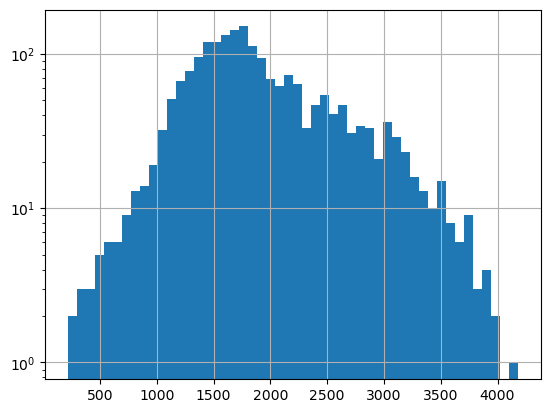

In [21]:
rois_df.area.hist(bins=50, log=True)

In [22]:
rois_df["area"].quantile([0.01, 0.99])

0.01     621.982903
0.99    3693.964144
Name: area, dtype: float64

In [23]:
q

NameError: name 'q' is not defined

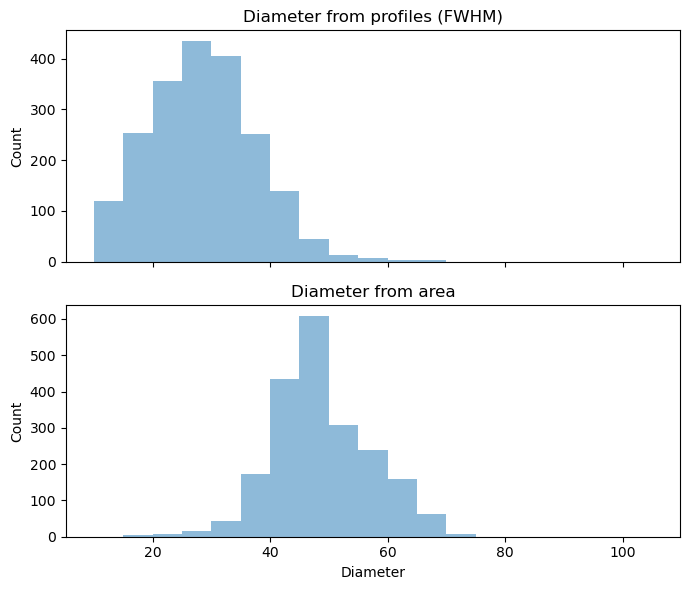

In [24]:
import matplotlib.pyplot as plt

bins = np.arange(10, 110, 5)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(7, 6))

if "diameter_fwhm" in rois_df.columns:
    rois_df["diameter_fwhm"].dropna().plot.hist(bins=bins, alpha=0.5, ax=axes[0])
    axes[0].set_title("Diameter from profiles (FWHM)")
    axes[0].set_ylabel("Count")
else:
    axes[0].text(0.5, 0.5, "No diameter_fwhm column", ha="center", va="center")
    axes[0].set_axis_off()

rois_df["diameter_area"].dropna().plot.hist(bins=bins, alpha=0.5, ax=axes[1])
axes[1].set_title("Diameter from area")
axes[1].set_xlabel("Diameter")
axes[1].set_ylabel("Count")

plt.tight_layout()

<Axes: ylabel='Frequency'>

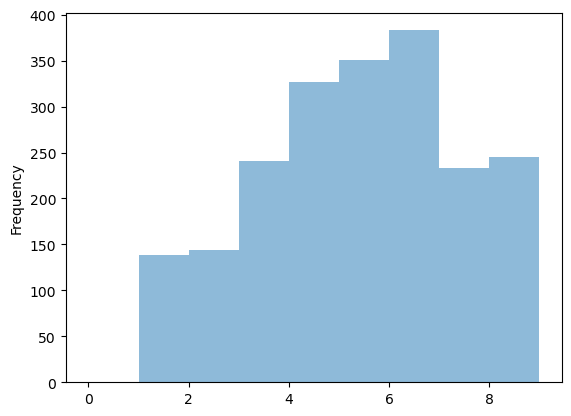

In [25]:
rois_df.neighbor_count.plot.hist(bins=np.arange(0, 10, 1), alpha=0.5)

In [26]:
summary_df

,id,stub,mean_neighbor_count,mean_neighbor_distance,mean_roi_area,mean_pixel_size,mean_diameter_area,mean_diameter_fwhm,mean_diameter_deriv,mean_profile_mad,porosity_square,porosity_hex,porosity_blend,blend_weight,mean_profile,mean_profile_diameter,mean_profile_diameter_deriv,mean_profile_diameter_baseline,mean_profile_step
0,FAS_24,FAS_24_ME_09,5.186441,30.229415,1804.696145,3.769,47.639979,28.365227,48.362582,11.036910,1.974898,2.280415,2.145407,0.593220,"[77.74152542372882, 77.79943502824858, 78.0216...",58.622957,35.683539,127.441211,0.338130
1,FAS_24,FAS_24_ME_10,4.863188,30.343391,1485.558333,3.653,43.149766,28.113695,44.532551,16.129619,1.613472,1.863077,1.712493,0.431594,"[112.97425952045134, 113.27256699576868, 113.5...",57.492717,35.932948,119.776494,0.327885
2,FAS_24,FAS_24_ME_11,4.833333,27.893672,2378.668681,3.692,54.404026,28.469143,46.123719,18.815657,3.057191,3.530140,3.237942,0.416667,"[140.87408759124088, 140.86922141119223, 141.0...",57.776336,34.934529,134.363572,0.363932


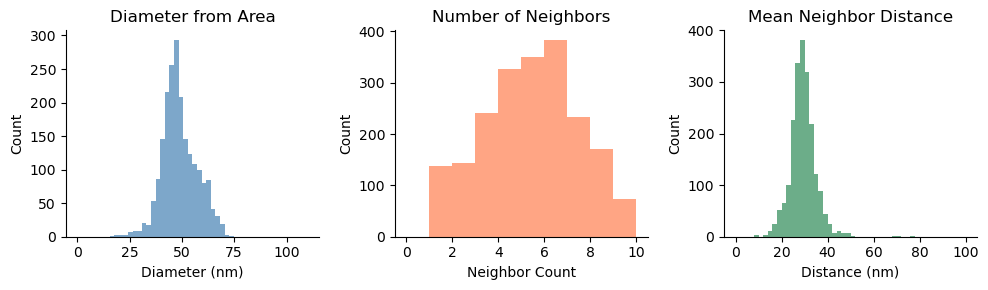

In [27]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Diameter area
rois_df["diameter_area"].dropna().plot.hist(bins=np.linspace(0, 110, 51), alpha=0.7, ax=axes[0], color="steelblue")
axes[0].set_title("Diameter from Area")
axes[0].set_xlabel("Diameter (nm)")
axes[0].set_ylabel("Count")

# Neighbor count
rois_df["neighbor_count"].dropna().plot.hist(bins=np.arange(0, rois_df["neighbor_count"].max() + 2, 1), alpha=0.7, ax=axes[1], color="coral")
axes[1].set_title("Number of Neighbors")
axes[1].set_xlabel("Neighbor Count")
axes[1].set_ylabel("Count")

# Mean neighbor distance
rois_df["mean_neighbor_distance"].dropna().plot.hist(bins=np.linspace(0, 100, 51), alpha=0.7, ax=axes[2], color="seagreen")
axes[2].set_title("Mean Neighbor Distance")
axes[2].set_xlabel("Distance (nm)")
axes[2].set_ylabel("Count")

sns.despine()
plt.tight_layout()
plt.show()

In [33]:
summary_df

,id,stub,mean_neighbor_count,mean_neighbor_distance,mean_roi_area,mean_pixel_size,mean_diameter_area,mean_diameter_fwhm,mean_diameter_deriv,mean_profile_mad,porosity_square,porosity_hex,porosity_blend,blend_weight,mean_profile,mean_profile_diameter,mean_profile_diameter_deriv,mean_profile_diameter_baseline,mean_profile_step
0,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME01,4.433460,25.615840,2597.115464,5.073,55.870837,42.838473,49.509481,23.748083,3.957984,4.570287,4.076346,0.216730,"[92.89733840304183, 92.95817490494296, 92.9971...",69.779570,38.946737,162.278069,0.319886
1,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME_02,4.888889,223.843034,19163.247968,5.131,129.001668,62.650286,147.490372,31.040679,0.382456,0.441623,0.406671,0.444444,"[135.47222222222223, 135.08333333333334, 134.4...",33.631158,NaN,258.701216,0.504193
2,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME_03,3.413793,64.562369,48485.974745,8.810,181.294192,63.910728,157.217950,23.470291,11.632076,13.431564,11.632076,0.000000,"[155.77586206896552, 155.1206896551724, 154.56...",112.853475,136.202470,381.366915,0.441714
3,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME_04,3.508711,14.949913,24581.713522,16.440,172.663007,70.476240,176.052076,18.376858,109.985344,127.000136,109.985344,0.000000,"[117.61106271777004, 117.77134146341463, 117.8...",183.554169,113.371693,464.284075,0.328385
4,FAS1/ME/FAS_1,FAS1/ME/FAS_1_ME_05,5.325581,55.288238,11007.934833,5.576,99.405625,41.401273,74.115997,18.479813,3.601143,4.158242,3.952076,0.662791,"[96.69767441860465, 96.37209302325581, 96.1918...",25.245470,36.720684,218.029062,0.411593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,FAS9/ME/FAS_9,FAS9/ME/FAS_9_ME_10,5.181818,187.948427,14857.641760,3.692,128.898652,35.099834,98.515668,25.436777,0.420603,0.485671,0.456764,0.590909,"[133.1590909090909, 132.5909090909091, 132.136...",32.095991,61.899411,229.257078,0.620956
302,FAS9/ME/FAS_9,FAS9/ME/FAS_9_ME_11,0.000000,NaN,12148.291727,9.217,124.369150,14.219869,159.220448,0.000000,NaN,NaN,NaN,0.000000,"[143.25, 142.0, 140.75, 141.0, 141.25, 141.25,...",58.579879,143.195260,325.443774,0.353091
303,FAS9/ME/FAS_9,FAS9/ME/FAS_9_ME_12,3.666667,219.845025,12508.589531,3.692,120.435907,19.446610,47.464517,17.722917,0.258806,0.298844,0.258806,0.000000,"[100.875, 100.08333333333333, 99.625, 101.5416...",19.380247,NaN,215.336076,0.583250
304,FAS9/ME/FAS_9,FAS9/ME/FAS_9_ME_overview01,1.000000,220.738353,23676.720345,3.489,124.437730,39.448350,54.067812,23.436250,0.485921,0.561094,0.485921,0.000000,"[75.25, 74.3125, 75.4375, 76.5625, 76.8125, 76...",60.993919,NaN,58.647999,0.672376


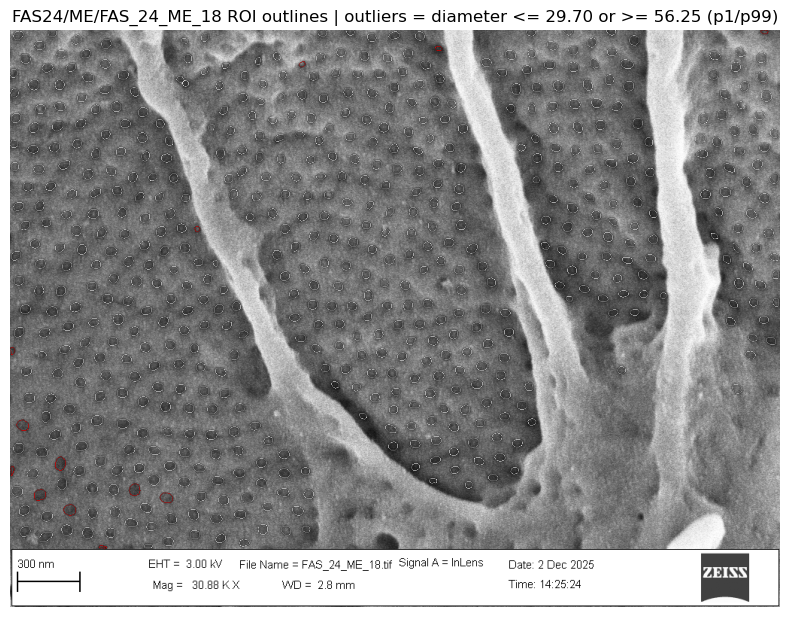

Requested stub: FAS24/ME/FAS_24_ME_18
Resolved stub: FAS24/ME/FAS_24_ME_18
Image file: D:\TestData\fenestrations\Original_image\FAS24\ME\FAS_24_ME_18.tif
Segmentation file: D:\TestData\fenestrations\seg_npy\FAS24\ME\FAS_24_ME_18_seg.npy
Diameter thresholds: <= 29.704 or >= 56.251
Outlier ROIs: 13 / 598


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tifffile
from pathlib import Path

original_data_path = Path("D:/TestData/fenestrations")

# --- Inputs ---
stub = "FAS24/ME/FAS_24_ME_18"             # full stub or tif basename; None -> first available stub
lower_pct = 0.01          # bottom percentile threshold
upper_pct = 0.99          # top percentile threshold
image_root = original_data_path / "Original_image"  # where .tif files are (searched recursively if needed)
seg_root = original_data_path / "seg_npy"    # where *_seg.npy files are (searched recursively if needed)

# --- Helpers ---
def resolve_file(root: Path, rel_stub: str, suffix: str) -> Path:
    direct = root / f"{rel_stub}{suffix}"
    if direct.exists():
        return direct

    target_name = f"{Path(rel_stub).name}{suffix}"
    matches = list(root.rglob(target_name))
    if matches:
        return matches[0]

    raise FileNotFoundError(
        f"Could not find {target_name} under {root}. "
        f"Set image_root/seg_root to the directory containing your files."
    )

# --- Validate inputs ---
if not (0 <= lower_pct < upper_pct <= 1):
    raise ValueError("Percentiles must satisfy 0 <= lower_pct < upper_pct <= 1")

all_stubs = rois_df["stub"].dropna().astype(str)
if all_stubs.empty:
    raise ValueError("No stub values found in rois_df['stub']")

if stub is None:
    stub = all_stubs.iloc[0]

query = Path(str(stub)).stem

# Match by exact stub OR basename (stem)
matches_exact = all_stubs[all_stubs == str(stub)]
matches_base = all_stubs[all_stubs.map(lambda s: Path(s).stem == query)]
matched_stubs = pd.Index(pd.concat([matches_exact, matches_base]).unique())

if len(matched_stubs) == 0:
    sample = sorted(all_stubs.unique().tolist())
    raise ValueError(
        f"Stub '{stub}' not found. Use full stub path or basename. "
        f"Available examples: {sample[:10]}{'...' if len(sample) > 10 else ''}"
    )

if len(matched_stubs) > 1:
    print(f"Multiple matches for '{stub}', using first: {matched_stubs[0]}")
    print("Matches:", list(matched_stubs[:10]), "..." if len(matched_stubs) > 10 else "")

stub_resolved = matched_stubs[0]
rois_stub = rois_df[rois_df["stub"].astype(str) == stub_resolved].copy()

q_low, q_high = rois_stub["diameter_area"].quantile([lower_pct, upper_pct])
outlier_ids = rois_stub.loc[(rois_stub["diameter_area"] <= q_low) | (rois_stub["diameter_area"] >= q_high), "roi_id"].astype(int).to_numpy()

# --- Load image and segmentation masks ---
img_path = resolve_file(Path(image_root), stub_resolved, ".tif")
seg_path = resolve_file(Path(seg_root), stub_resolved, "_seg.npy")

raw = tifffile.imread(img_path)
image = raw[0] if raw.ndim > 2 else raw

arr = np.load(seg_path, allow_pickle=True)
payload = arr.item() if arr.ndim == 0 and arr.dtype == object else arr
masks = payload["masks"] if isinstance(payload, dict) and "masks" in payload else payload

# --- Build boundary mask ---
boundary = np.zeros_like(masks, dtype=bool)
diff_ud = masks[1:, :] != masks[:-1, :]
diff_lr = masks[:, 1:] != masks[:, :-1]
boundary[1:, :] |= diff_ud
boundary[:-1, :] |= diff_ud
boundary[:, 1:] |= diff_lr
boundary[:, :-1] |= diff_lr

is_outlier_roi = np.isin(masks, outlier_ids)
outlier_boundary = boundary & is_outlier_roi
inlier_boundary = boundary & (masks > 0) & (~is_outlier_roi)

# --- Overlay display ---
overlay = np.zeros((*masks.shape, 4), dtype=float)
overlay[inlier_boundary] = [1, 1, 1, 1]   # white inliers
overlay[outlier_boundary] = [1, 0, 0, 1]  # red outliers

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap="gray")
ax.imshow(overlay)
ax.set_title(
    f"{stub_resolved} ROI outlines | outliers = diameter <= {q_low:.2f} or >= {q_high:.2f} "
    f"(p{lower_pct*100:.0f}/p{upper_pct*100:.0f})"
)
ax.axis("off")
plt.tight_layout()
plt.show()

print(f"Requested stub: {stub}")
print(f"Resolved stub: {stub_resolved}")
print(f"Image file: {img_path}")
print(f"Segmentation file: {seg_path}")
print(f"Diameter thresholds: <= {q_low:.3f} or >= {q_high:.3f}")
print(f"Outlier ROIs: {len(outlier_ids)} / {len(rois_stub)}")

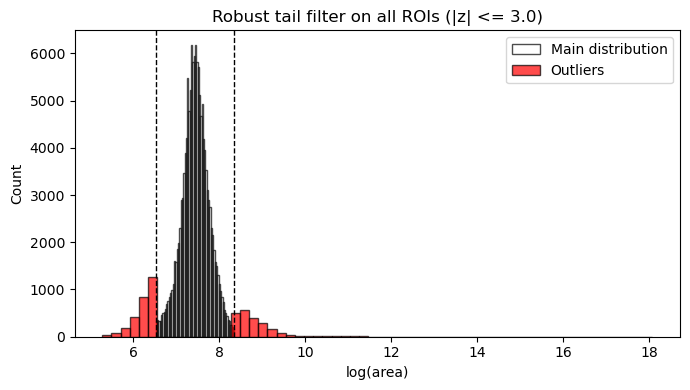

Median(log(area)): 7.435
Robust sigma: 0.305
Keep range in log(area): [6.520, 8.350]
Main: 138910 | Outliers: 4920


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Robust-tail filtering on all ROIs using log(area)
log_area = np.log(rois_df["area"].to_numpy())

median_log = np.median(log_area)
mad_log = np.median(np.abs(log_area - median_log))
if mad_log == 0:
    raise ValueError("MAD is zero; robust z-score cannot be computed.")

robust_sigma = 1.4826 * mad_log
robust_z = (log_area - median_log) / robust_sigma

z_thresh = 3.0  # increase to 3.5 for fewer outliers; decrease to 2.5 for more
keep = np.abs(robust_z) <= z_thresh

rois_df["is_main_distribution"] = keep
rois_df["robust_z_log_area"] = robust_z

lower_keep = median_log - z_thresh * robust_sigma
upper_keep = median_log + z_thresh * robust_sigma

plt.figure(figsize=(7, 4))
plt.hist(log_area[keep], bins=60, alpha=0.7, color="white", edgecolor="black", label="Main distribution")
plt.hist(log_area[~keep], bins=60, alpha=0.7, color="red", edgecolor="black", label="Outliers")
plt.axvline(lower_keep, color="black", linestyle="--", linewidth=1)
plt.axvline(upper_keep, color="black", linestyle="--", linewidth=1)
plt.xlabel("log(area)")
plt.ylabel("Count")
plt.title(f"Robust tail filter on all ROIs (|z| <= {z_thresh})")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Median(log(area)): {median_log:.3f}")
print(f"Robust sigma: {robust_sigma:.3f}")
print(f"Keep range in log(area): [{lower_keep:.3f}, {upper_keep:.3f}]")
print(f"Main: {keep.sum()} | Outliers: {(~keep).sum()}")

<Axes: ylabel='Frequency'>

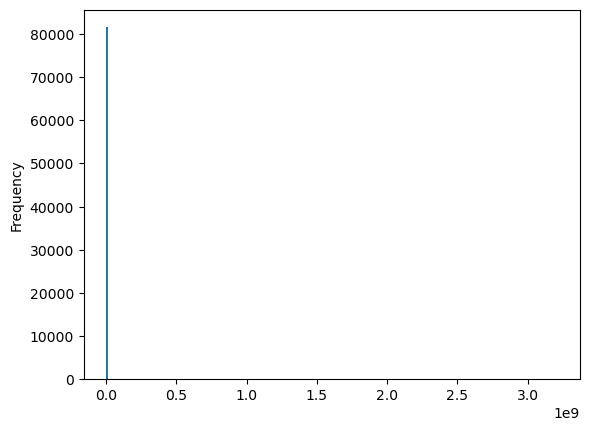

In [44]:
rois_df.area.plot(kind="hist",
                  bins=200,
                  #log=True
                  )

In [33]:
# New DataFrame excluding robust-z outliers (|z| > 3)
z_cutoff = 3.5

if "robust_z_log_area" not in rois_df.columns:
    log_area = np.log(rois_df["area"].to_numpy())
    median_log = np.median(log_area)
    mad_log = np.median(np.abs(log_area - median_log))
    if mad_log == 0:
        raise ValueError("MAD is zero; robust z-score cannot be computed.")
    robust_sigma = 1.4826 * mad_log
    rois_df["robust_z_log_area" ] = (log_area - median_log) / robust_sigma

rois_df_no_outliers = rois_df[np.abs(rois_df["robust_z_log_area"]) <= z_cutoff].copy()
rois_df_outliers = rois_df[np.abs(rois_df["robust_z_log_area"]) > z_cutoff].copy()

print(f"z cutoff: {z_cutoff}")
print(f"Kept rows: {len(rois_df_no_outliers)}")
print(f"Excluded outliers: {len(rois_df_outliers)}")
print(f"Kept fraction: {len(rois_df_no_outliers)/len(rois_df):.2%}")

z cutoff: 3.5
Kept rows: 140646
Excluded outliers: 3184
Kept fraction: 97.79%


In [34]:
rois_df_no_outliers.diameter_area.describe()

count    140646.000000
mean         47.081687
std           7.844526
min          27.258937
25%          42.188423
50%          46.439516
75%          51.444482
max          79.183194
Name: diameter_area, dtype: float64

Image root: D:\TestData\fenestrations\images
Segmentation root: D:\TestData\fenestrations\masks


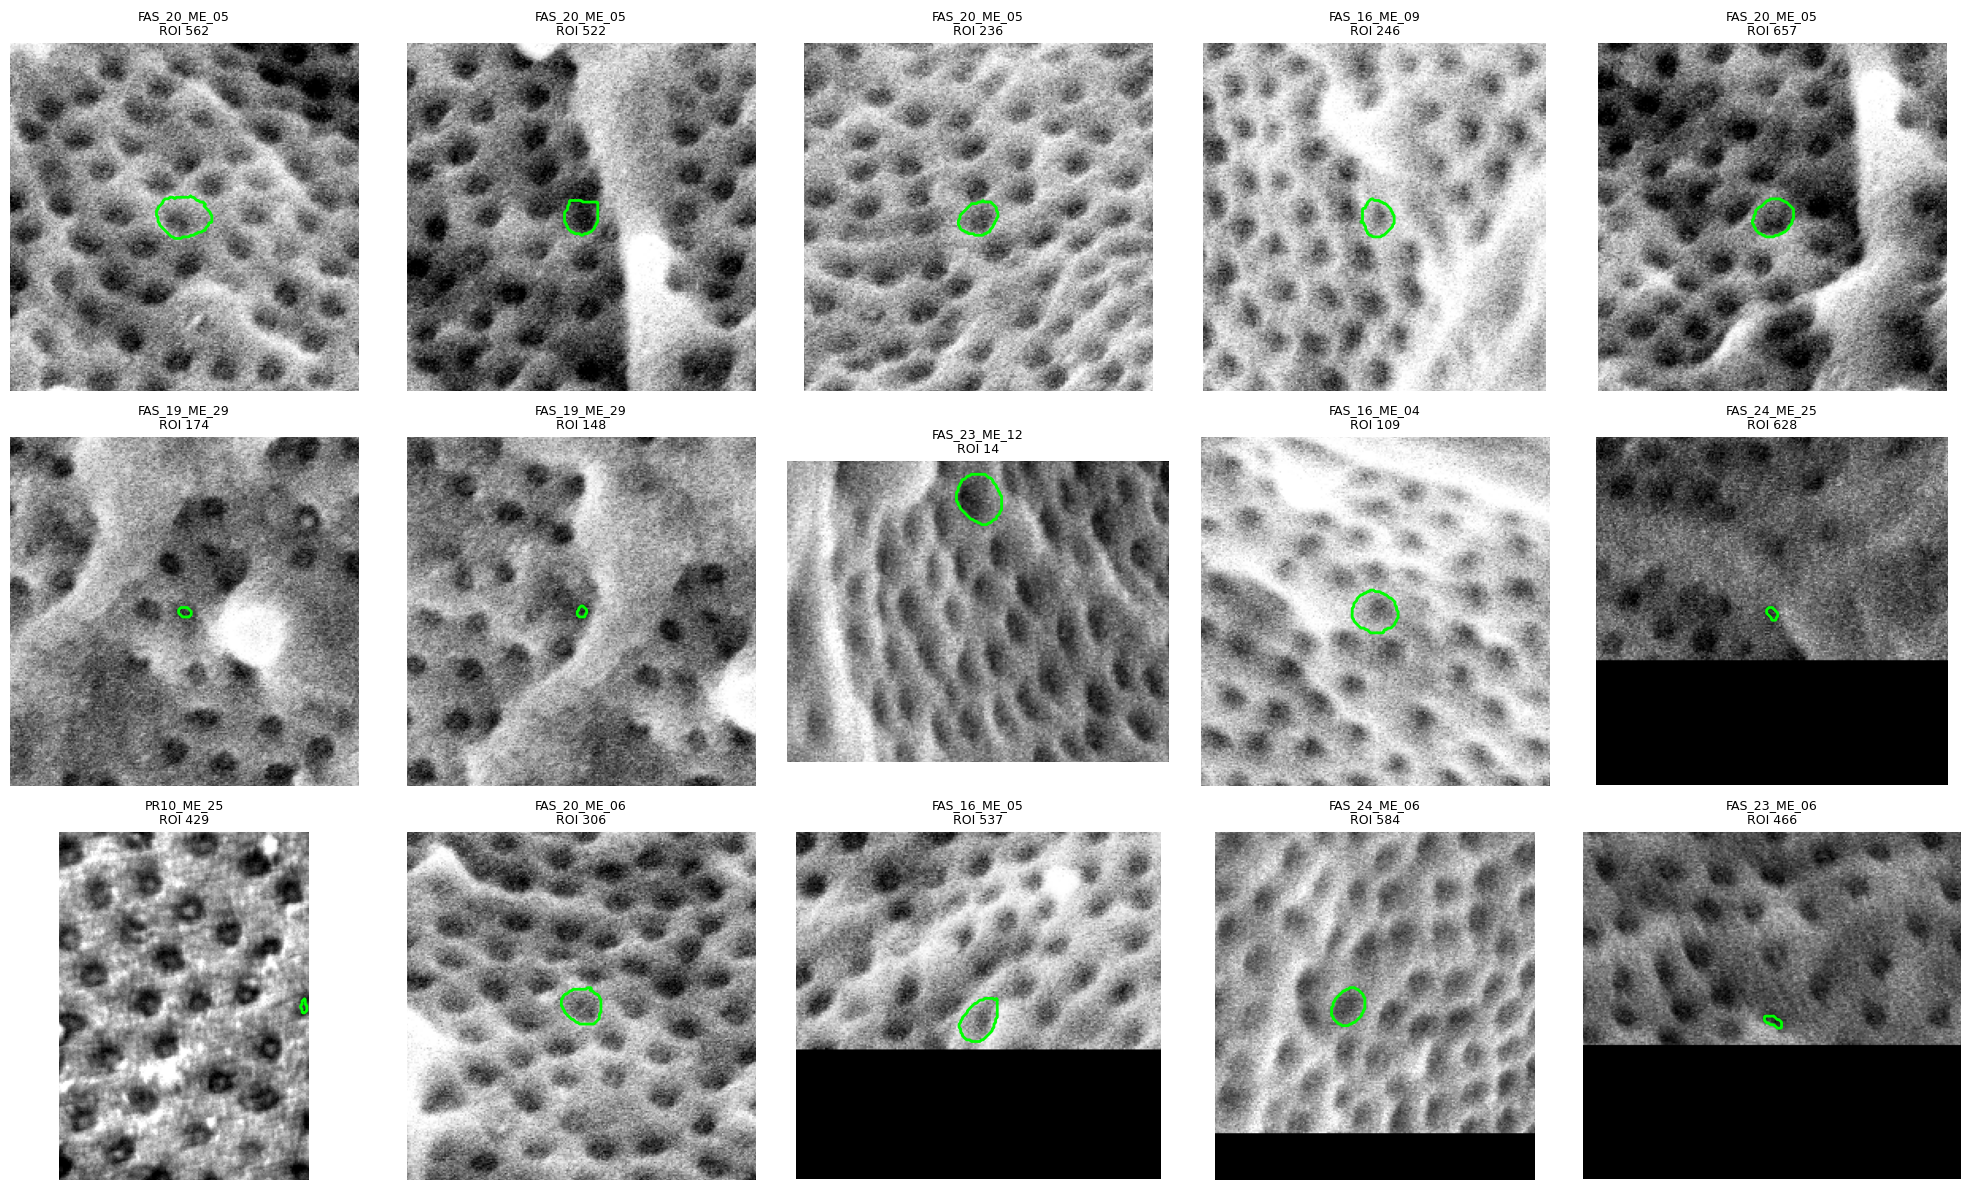

Plotted outlines: 15/15
Missing TIFF: 0
Missing segmentation: 0
ROI id not present in mask: 0


In [35]:
import matplotlib.pyplot as plt
import tifffile


def _load_masks(seg_path: Path):
    arr = np.load(seg_path, allow_pickle=True)
    payload = arr.item() if arr.ndim == 0 and arr.dtype == object else arr
    if isinstance(payload, dict) and "masks" in payload:
        return payload["masks"]
    return payload


def _resolve_file(root: Path, stub: str, kind: str) -> Path | None:
    stub_path = Path(stub)
    stem = stub_path.stem
    basename = stub_path.name

    if kind == "tif":
        direct_candidates = [
            root / f"{stub}.tif",
            root / f"{stub}.tiff",
            root / f"{basename}.tif",
            root / f"{basename}.tiff",
            root / f"{stem}.tif",
            root / f"{stem}.tiff",
        ]
        patterns = [f"{basename}.tif", f"{basename}.tiff", f"{stem}.tif", f"{stem}.tiff"]
    elif kind == "seg":
        direct_candidates = [
            root / f"{stub}_seg.npy",
            root / f"{basename}_seg.npy",
            root / f"{stem}_seg.npy",
        ]
        patterns = [f"{basename}_seg.npy", f"{stem}_seg.npy"]
    else:
        return None

    for candidate in direct_candidates:
        if candidate.exists():
            return candidate

    for pattern in patterns:
        matches = sorted(root.rglob(pattern))
        if matches:
            return matches[0]

    return None


def _roi_view_window(roi_mask: np.ndarray, shape: tuple[int, int], pad: int = 80, min_size: int = 180):
    h, w = shape
    ys, xs = np.where(roi_mask)

    if ys.size == 0 or xs.size == 0:
        cx, cy = w // 2, h // 2
        half = max(min_size // 2, 1)
        x0, x1 = max(0, cx - half), min(w, cx + half)
        y0, y1 = max(0, cy - half), min(h, cy + half)
        return x0, x1, y0, y1

    x0 = max(0, int(xs.min()) - pad)
    x1 = min(w, int(xs.max()) + pad)
    y0 = max(0, int(ys.min()) - pad)
    y1 = min(h, int(ys.max()) + pad)

    if (x1 - x0) < min_size:
        cx = (x0 + x1) // 2
        half = min_size // 2
        x0, x1 = max(0, cx - half), min(w, cx + half)
    if (y1 - y0) < min_size:
        cy = (y0 + y1) // 2
        half = min_size // 2
        y0, y1 = max(0, cy - half), min(h, cy + half)

    return x0, x1, y0, y1


n_samples = min(15, len(rois_df_outliers))
if n_samples == 0:
    print("No outliers found in rois_df_outliers.")
else:
    sample_df = rois_df_outliers.sample(n=n_samples, random_state=42).reset_index(drop=True)

    image_root = Path(r"D:\TestData\fenestrations\images")
    seg_root = Path(r"D:\TestData\fenestrations\masks")

    if not image_root.exists():
        raise FileNotFoundError(f"Image directory does not exist: {image_root}")
    if not seg_root.exists():
        raise FileNotFoundError(f"Segmentation directory does not exist: {seg_root}")

    print(f"Image root: {image_root}")
    print(f"Segmentation root: {seg_root}")

    fig, axes = plt.subplots(3, 5, figsize=(20, 12))
    axes = axes.ravel()

    missing_tif = 0
    missing_seg = 0
    missing_roi = 0
    plotted = 0

    for i, (_, row) in enumerate(sample_df.iterrows()):
        ax = axes[i]
        stub = str(row["stub"])
        roi_id = int(row["roi_id"])

        tif_path = _resolve_file(image_root, stub, "tif")
        seg_path = _resolve_file(seg_root, stub, "seg")

        if tif_path is None:
            missing_tif += 1
        if seg_path is None:
            missing_seg += 1

        if tif_path is None or seg_path is None:
            ax.set_title(f"Missing file(s)\n{stub}", fontsize=9)
            ax.axis("off")
            continue

        image = tifffile.imread(tif_path)
        if image.ndim > 2:
            image = image[0]

        masks = _load_masks(seg_path)
        roi_mask = masks == roi_id

        ax.imshow(image, cmap="gray")
        ax.contour(roi_mask.astype(float), levels=[0.5], colors="lime", linewidths=2.0)

        x0, x1, y0, y1 = _roi_view_window(roi_mask, image.shape, pad=90, min_size=220)
        ax.set_xlim(x0, x1)
        ax.set_ylim(y1, y0)

        if np.any(roi_mask):
            ax.set_title(f"{Path(stub).name}\nROI {roi_id}", fontsize=9)
            plotted += 1
        else:
            ax.set_title(f"{Path(stub).name}\nROI {roi_id} (not in mask)", fontsize=9)
            missing_roi += 1

        ax.axis("off")

    for j in range(n_samples, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

    print(f"Plotted outlines: {plotted}/{n_samples}")
    print(f"Missing TIFF: {missing_tif}")
    print(f"Missing segmentation: {missing_seg}")
    print(f"ROI id not present in mask: {missing_roi}")

In [19]:
summary_df.columns

Index(['id', 'stub', 'mean_neighbor_count',
       'mean_cluster_neighbor_distance_px',
       'mean_cluster_neighbor_distance_nm', 'mean_roi_area_nm2',
       'mean_pixel_size_nm_per_px', 'mean_diameter_area_nm',
       'mean_diameter_major_nm', 'mean_diameter_minor_nm',
       'mean_diameter_four_axis_nm', 'mean_profile_major_smpls',
       'mean_profile_minor_smpls', 'mean_four_axis_smpls', 'porosity_square',
       'porosity_hex', 'porosity_blend', 'blend_weight'],
      dtype='str')

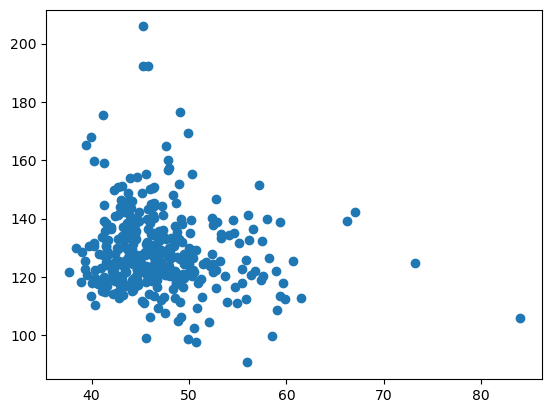

In [22]:
plt.scatter(summary_df.mean_diameter_area_nm.values, summary_df.mean_cluster_neighbor_distance_nm.values)